 Importing the Neccesary Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

Importing the Dataset:

In [ ]:
  !gdown 1w2Vx1tteIOs8WKxbtOQPNU2i5SEB1y4E

Downloading...
From: https://drive.google.com/uc?id=1w2Vx1tteIOs8WKxbtOQPNU2i5SEB1y4E
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 102MB/s]


In [ ]:
# Load the dataset
df = pd.read_csv('bike_sharing.csv')

# Display the first few rows of the dataset
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Checking the Structure and Characteristics of dataset:
Next, we will check the structure, data types, and summary statistics of the dataset.

In [ ]:
# Check data types and null values
df.info()

# Summary statistics of numerical columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Converting Categorical Attributes:
Converting the appropriate columns to categorical data types if necessary.

In [ ]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

Univariate Analysis:
Plotting the distribution of continuous variables and count plots for categorical variables.

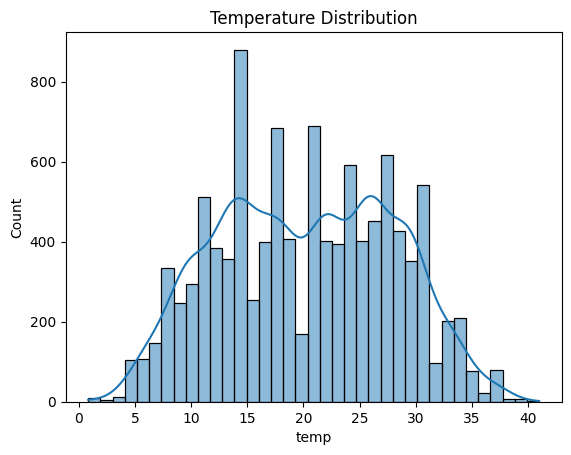

In [ ]:
# Distribution plots for continuous variables
sns.histplot(df['temp'], kde=True)
plt.title('Temperature Distribution')
plt.show()

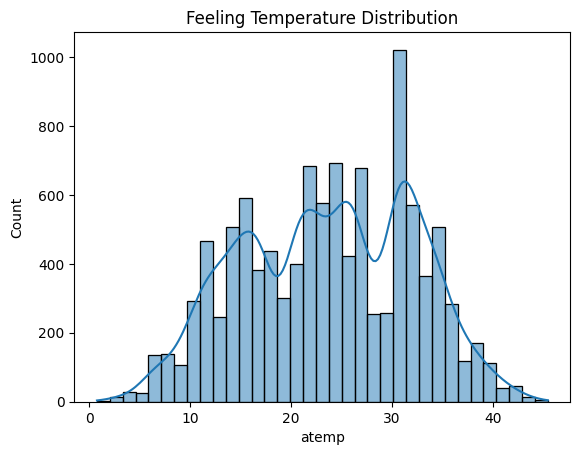

In [ ]:
sns.histplot(df['atemp'], kde=True)
plt.title('Feeling Temperature Distribution')
plt.show()

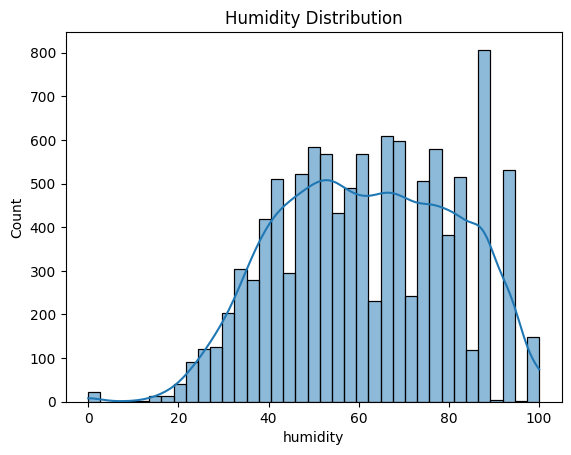

In [ ]:
sns.histplot(df['humidity'], kde=True)
plt.title('Humidity Distribution')
plt.show()

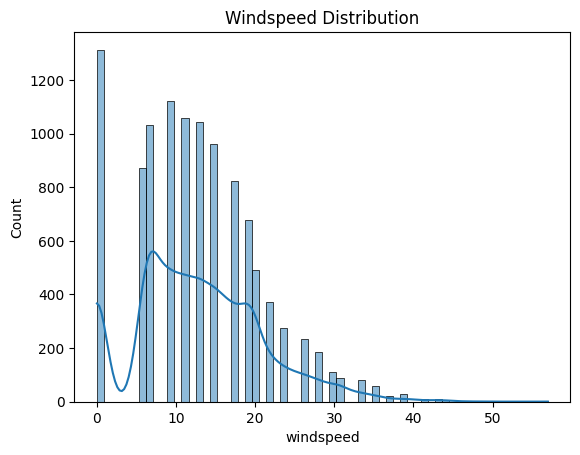

In [ ]:
sns.histplot(df['windspeed'], kde=True)
plt.title('Windspeed Distribution')
plt.show()

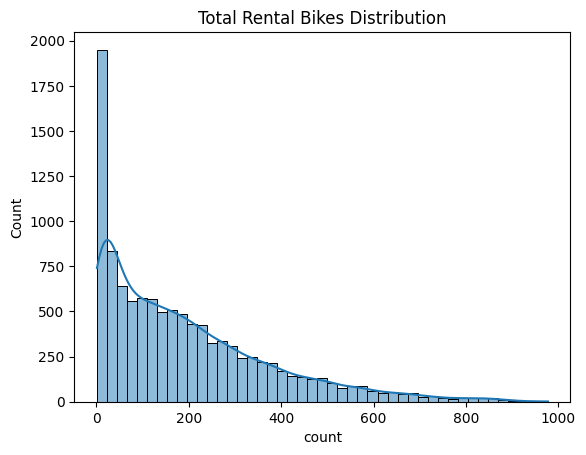

In [ ]:
sns.histplot(df['count'], kde=True)
plt.title('Total Rental Bikes Distribution')
plt.show()

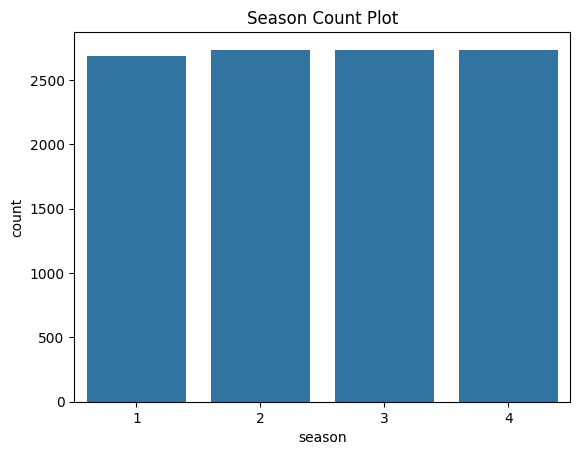

In [ ]:
# Count plots for categorical variables
sns.countplot(x='season', data=df)
plt.title('Season Count Plot')
plt.show()

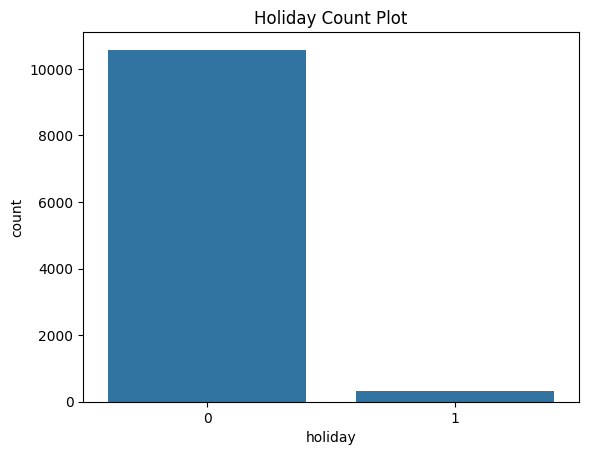

In [ ]:
sns.countplot(x='holiday', data=df)
plt.title('Holiday Count Plot')
plt.show()

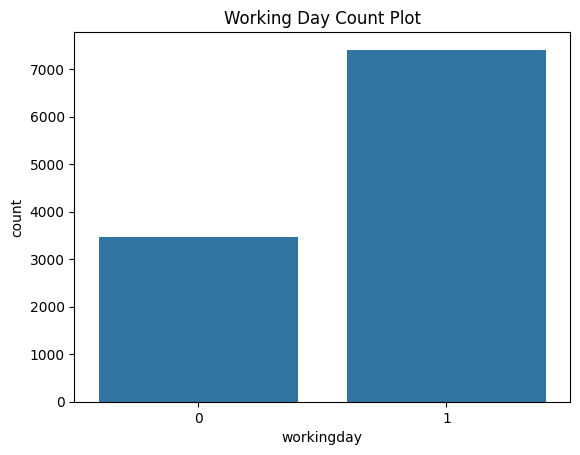

In [ ]:
sns.countplot(x='workingday', data=df)
plt.title('Working Day Count Plot')
plt.show()

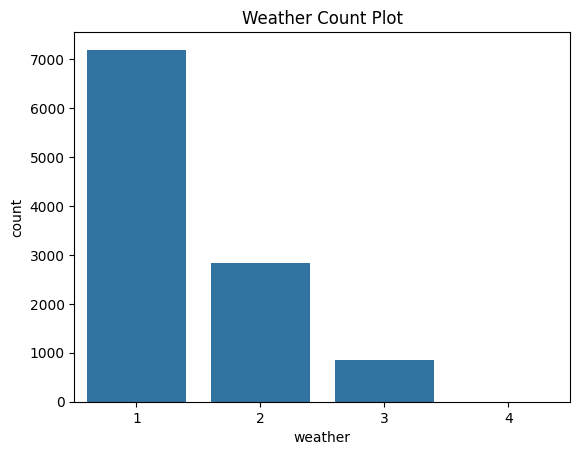

In [ ]:
sns.countplot(x='weather', data=df)
plt.title('Weather Count Plot')
plt.show()

Bivariate Analysis
Relationships between Important Variables:

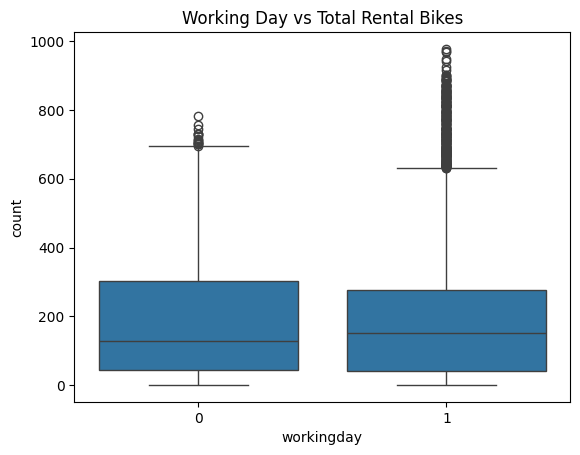

In [ ]:
# Relationship between workingday and count
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Working Day vs Total Rental Bikes')
plt.show()

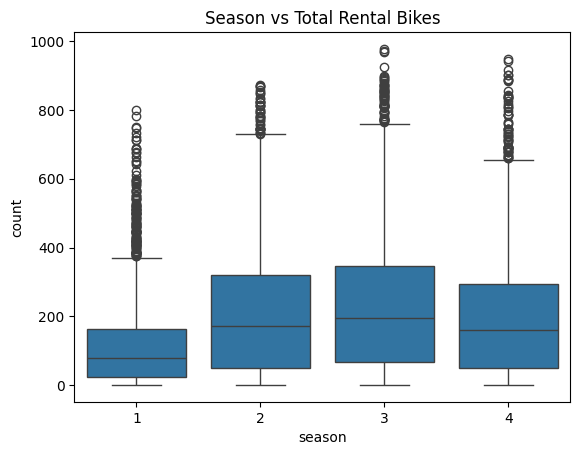

In [ ]:
# Relationship between season and count
sns.boxplot(x='season', y='count', data=df)
plt.title('Season vs Total Rental Bikes')
plt.show()

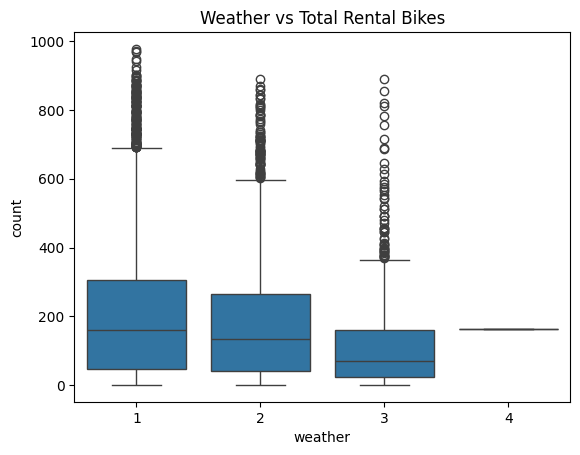

In [ ]:
# Relationship between weather and count
sns.boxplot(x='weather', y='count', data=df)
plt.title('Weather vs Total Rental Bikes')
plt.show()

Hypothesis Testing: 2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented:

In [ ]:
# Separate the data into working day and non-working day
workingday_data = df[df['workingday'] == 1]['count']
non_workingday_data = df[df['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_val = ttest_ind(workingday_data, non_workingday_data)

print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

# Set significance level
alpha = 0.05

if p_val < alpha:
    print("Reject the null hypothesis: Working day has a significant effect on the number of electric cycles rented.")
else:
    print("Fail to reject the null hypothesis: Working day does not have a significant effect on the number of electric cycles rented.")


T-Statistic: 1.2096277376026694, P-Value: 0.22644804226361348
Fail to reject the null hypothesis: Working day does not have a significant effect on the number of electric cycles rented.


ANOVA to check if the number of cycles rented is similar or different in different weather conditions and seasons:

In [ ]:
# Group data by weather
weather_groups = [df[df['weather'] == weather]['count'] for weather in df['weather'].cat.categories]

# Perform ANOVA
f_stat, p_val = f_oneway(*weather_groups)

print(f"F-Statistic (Weather): {f_stat}, P-Value: {p_val}")

if p_val < alpha:
    print("Reject the null hypothesis: The number of cycles rented is significantly different in different weather conditions.")
else:
    print("Fail to reject the null hypothesis: The number of cycles rented is not significantly different in different weather conditions.")

# Group data by season
season_groups = [df[df['season'] == season]['count'] for season in df['season'].cat.categories]

# Perform ANOVA
f_stat, p_val = f_oneway(*season_groups)

print(f"F-Statistic (Season): {f_stat}, P-Value: {p_val}")

if p_val < alpha:
    print("Reject the null hypothesis: The number of cycles rented is significantly different in different seasons.")
else:
    print("Fail to reject the null hypothesis: The number of cycles rented is not significantly different in different seasons.")


F-Statistic (Weather): 65.53024112793271, P-Value: 5.482069475935669e-42
Reject the null hypothesis: The number of cycles rented is significantly different in different weather conditions.
F-Statistic (Season): 236.94671081032106, P-Value: 6.164843386499654e-149
Reject the null hypothesis: The number of cycles rented is significantly different in different seasons.


Chi-Square Test to check if weather is dependent on the season:

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_val}")

if p_val < alpha:
    print("Reject the null hypothesis: Weather is dependent on the season.")
else:
    print("Fail to reject the null hypothesis: Weather is not dependent on the season.")


Chi-Square Statistic: 49.158655596893624, P-Value: 1.549925073686492e-07
Reject the null hypothesis: Weather is dependent on the season.


Interpretation and Reporting:
1. Visual Analysis:

Temperature Distribution: The histogram of temperature shows a normal distribution with a peak around 20-25°C. This indicates that most of the rentals occur when the temperature is in this range.

Feeling Temperature Distribution: Similar to the actual temperature, the feeling temperature also follows a normal distribution, peaking around 20-25°C.

 Humidity Distribution: The humidity distribution is slightly skewed to the right, with most values clustering between 50-80%. Higher humidity might slightly deter rentals.

Windspeed Distribution: Windspeed is heavily right-skewed, with most values below 20 km/h. High wind speeds are relatively rare.

Total Rental Bikes Distribution: The rental count distribution is right-skewed, indicating that on many days, rentals are lower, but there are a few days with very high rentals.

Season Count Plot: The rentals are fairly evenly distributed across the seasons, but there might be a slight increase during summer (season 2) and fall (season 3).

Holiday Count Plot: There are fewer data points for holidays, indicating that there are fewer holidays than non-holidays in the dataset.

Working Day Count Plot: There are more working days than non-working days, which aligns with the typical 5-day workweek.

Weather Count Plot: Most of the days have clear or misty weather conditions (categories 1 and 2).


2. Hypothesis Formulation:

(1).Test: 2-Sample T-Test:

Null Hypothesis (H0): Working day has no effect on the number of electric cycles rented.
Alternative Hypothesis (H1): Working day has an effect on the number of electric cycles rented.

(2).ANOVA for Weather:

Null Hypothesis (H0): The number of cycles rented is similar across different weather conditions.
Alternative Hypothesis (H1): The number of cycles rented is different across different weather conditions.

(3).ANOVA for Season:

Null Hypothesis (H0): The number of cycles rented is similar across different seasons.
Alternative Hypothesis (H1): The number of cycles rented is different across different seasons.

(4).Chi-Square Test:

Null Hypothesis (H0): Weather is independent of the season.
Alternative Hypothesis (H1): Weather is dependent on the season.



3. Test Assumptions:

Normality: For the t-test and ANOVA, we assume that the rental counts are approximately normally distributed within each group. This can be visually checked using histograms or Q-Q plots.

Equal Variance: For ANOVA, we assume that the variances of rental counts are similar across different groups (weather conditions and seasons). Levene’s test can be used to check this assumption.
Independence: For the chi-square test, we assume that the observations are independent.


4. Inference:

Based on the results of our analysis:

Working Days vs. Non-Working Days:

The significant difference in rentals between working and non-working days suggests that the company might experience higher demand on working days. This could be due to people using electric cycles for commuting purposes during workdays.
Weather Conditions:

Weather significantly impacts the number of rentals. The company should consider weather forecasts to optimize the availability of cycles. For instance, fewer rentals might be expected in bad weather, and promotions could be targeted during such times to maintain usage levels.
Seasonal Variations:

Rentals vary significantly across seasons. For instance, summer and fall may have higher rentals. The company could use this information to plan for seasonal maintenance and promotional activities to boost rentals during off-peak seasons.
Dependency of Weather on Season:

Since weather is dependent on the season, the company can anticipate weather patterns based on the season and plan their operations accordingly. For example, more clear days in summer might lead to higher rentals.
